# Machine Learning classification for DR3
Output for the [confluence page](https://confluence.slac.stanford.edu/display/SCIGRPS/The+UW+Machine+Learning+classification) 

<h5 style="text-align:right; margin-right:15px"> 2023-12-15 12:05</h5>

### Data preparation
We select 6417 persistent point sources from the 4FGL-DR3 catalog. We create
an `association` property based on the `CLASS1` field. This takes its lower-case value with `unk` combined with 
completely unassociated to `unid`.

### Scikit-learn parameters

The context is the scikit-learn package

* __Targets__: We observe that 90% of the associated sources are pulsars (MSP (`msp`) or young (`psr`) or 
blazars, BL Lac (`bll`) or FSRQ (`fsrq`), including `bcu`. Thus we choose three classes for training:
pulsar=`psr+msp+glc`,
combined to represent pulsars,  `bll`, and `fsrq`. Note that this does not include the blazar `bcu` class, as 
it is a mixture and we choose to distinguish `bll` from `fsrq`.

* __Features__: We assume that the separation needs only variability and spectral information. For the 
spectral information we use the three parameters of the log parabola spectral function: the energy and
energy flux at the peak of the SED, $E_p$  and $F_p$ and the curvature $d$, (We examine spatial
information later to check that sources predicted to be "pulsars" are  indeed Galactic.)
* __Classification model__: We use the SVC model.

### The features for the target names
This plot shows the distributions of the features for each of the three targets. For the variability,
Ep  and Fp we use the log base 10 values log_var, log_fpeak, and log_epeak.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9b8c07c130>
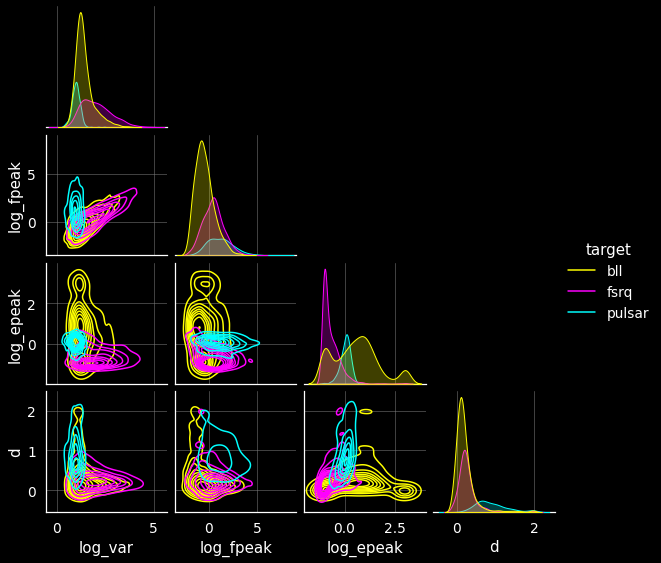

## Fitting
This means training the model with the target classes, then using it to predict the most likely
identity of other sources. We are most interested in the unid sources, but apply it to all.

### Confusion analysis
The following is the output of the "confusion analysis", which trains with a randomly selected 75%
of the targets, then checks the result of predictions for the remaining 25%.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9b89f05690>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9b8c0b0e80>
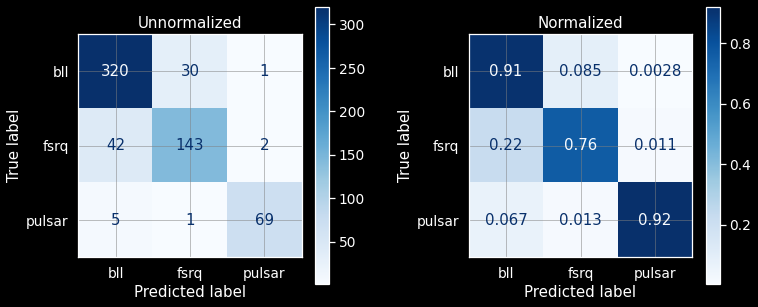

We are only interested in how well the pulsar category is selected, so the mixing between the
two blazar categories is not an issue. So ~10% of real pulsars are lost, with <5% contamination of
FSRQs. This means ~90% efficiency and >95% purity. 

### Prediction statistics
This shows the category assignment for all the association types, including the targets.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9b885fe7a0>
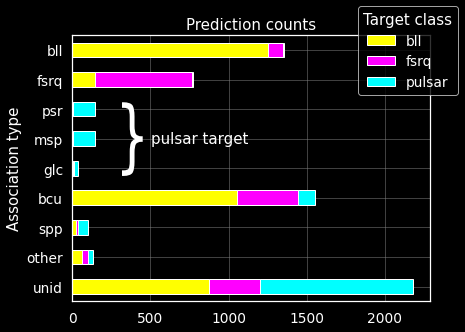

## Unid prediction probabilities
The prediction procedure estimates the three probabilities. In Figure 1.4 we show the distribution of the pulsar
probability, tagged with the prediction category, and the cumulative distributions.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9b883c6a40>
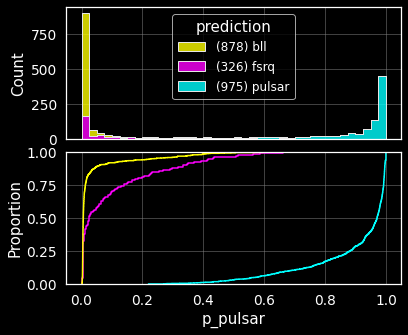

## Unid features
Finally, here are the distributions of the features for the unid class, for each prediction.

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f9b63d57760>
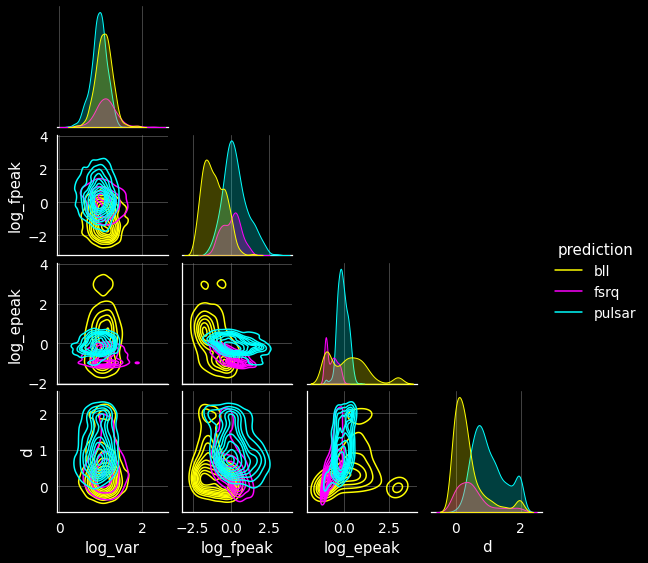

## Write summary table if it doesn't exist.

File `files/dr3_classification.csv` exists--not overwriting.


In [1]:
%run pylib/ml_fitter doc dr3 dark